# Baseline Analysis - Preview

### These visualizations are a first step to analyze the cellular composition of the samples. They provide a fist tool, and users will need to adjust the script for specific analysis.

First set color dictionaries for all categories you plan to display. This can be adjusted anytime. 

In [1]:
# Color cell types
cell_color_dic = {
'NK':'yellowgreen',
'Enterocyte':'tan',
'MUC1+ Enterocyte':'navy',
'TA':'red', 
'CD66+ Enterocyte':'goldenrod',
'Paneth':'blueviolet',
'Smooth muscle':'darkorange',   
'Goblet':'teal',
'Neuroendocrine':'olive',
'CD57+ Enterocyte':'dimgray',
'Lymphatic':'indigo',
'CD8+ T cell':'lightcoral',
'DC':'cyan',
'M2 Macrophage':"#852405",
'MUC6+ Enterocyte':'beige',
'B cell':'red',
'Neutrophil':'lightcyan',
'Endothelial':'royalblue', 
'cycling TA':"#fad139",
'Plasma':'black',
'CD4+ T cell':'skyblue',
'Stroma':'fuchsia',
'Nerve': "#52ef99",
'ICC': "#ea466d",
'Unknown': "lightgray",
'Noise': "darkgray",
}

# Color tissues
tissue_location_color_dic = {
    'SB':"#5577A4", 
    'CL':"#E68B39"
}

# Color overall cell types 
subtype_col_dic = {"Epithelial": "#efe6d5",
"Stromal":"#9dbeb7",
"Immune":"#e73213",
}

# Color CNs
neighborhood_color_dic = {
 'Epithelial': "#68affc", 
 'Mature Epithelial': "#4b4f7a", 
 'Innate Immune Enriched': "#75e7dd", 
 'Paneth Enriched': "#169294", 
 'Secretory Epithelial': "#0a4f4e", 
 'Adatpive Immune Enriched': "#66de78", 
 'Glandular Epithelial': "#2a9739", 
 'CD8+ T Enriched IEL': "#c5df72", 
 'Stroma': "#788c3b", 
 'CD66+ Mature Epithelial': "#cad7d4", 
 'Innervated Smooth Muscle': "#6d4c2b", 
 "Vasculature": "#e23209", 
 'Follicle': "#9a4058", 
 'Plasma Cell Enriched': "#e28196", 
 'Smooth Muscle': "#ff0087", 
 'Stroma & Innate Immune': "#feba53", 
 'Innervated Stroma': "#a68a88", 
 'Transit Amplifying Zone': "#474cd3"
}

# Color communities
community_color_dic = {
'Stroma':"#a1def0",  
'Secretory Epithelial': "#088490", 
'Mature Epithelial':"#4aeeb6",
'Adaptive Immune Enriched':"#1e7b20", 
'Smooth Muscle':"#b6e45c",
'Plasma Cell Enriched':"#683d0d", 
'CD66+ Mature Epithelial':"#bd854a", 
'Follicle':"#f24219"  
}

# Load packages

Load libraries that you will need to perform basic tasks such as directory handling or loading of data.

In [2]:
#import standard packages
import os
import sys
import anndata as ad

Load the custom functions. For that specify the directory where the functions are stored.

In [3]:
sys.path.append('/Users/timnoahkempchen/Desktop/SAP5/src') # This code is only needed if you want to load functions from a non-default directory

from helperfunctions_hf import * # Helper functions - used by other functions to execute steps like table formatting etc. KEY: hf
from preprocessing_pp import * # Preprocessing functions - to normalize and prepare data for further analysis KEY: pp
from tools_tl import * # tools - perform calculation on the data KEY: tl
from plot_pl import * # plotting functions - used to visualize results KEY: pl

# Load data

Specify an input directory and load your data from this directory. 

In [4]:
input_dir = '/Users/timnoahkempchen/Library/CloudStorage/GoogleDrive-timkem@stanford.edu/Meine Ablage/SAP_figures/New_segmented_dataset/Output_preprocessing/'

In [5]:
adata = ad.read_h5ad(input_dir+"adata_nn_demo_hubmap_intestine_20231014_annotated.h5ad")

Define an output directory.  

In [6]:
output_dir = "/Users/timnoahkempchen/Downloads/Test_folder"

# Spatial representation of data

Generate a first spatial overview with the catplot function. This function generates a xy plot for every unique region colored by a variable e.g. cell type.
Subsetting allows to plot only specific regions. 

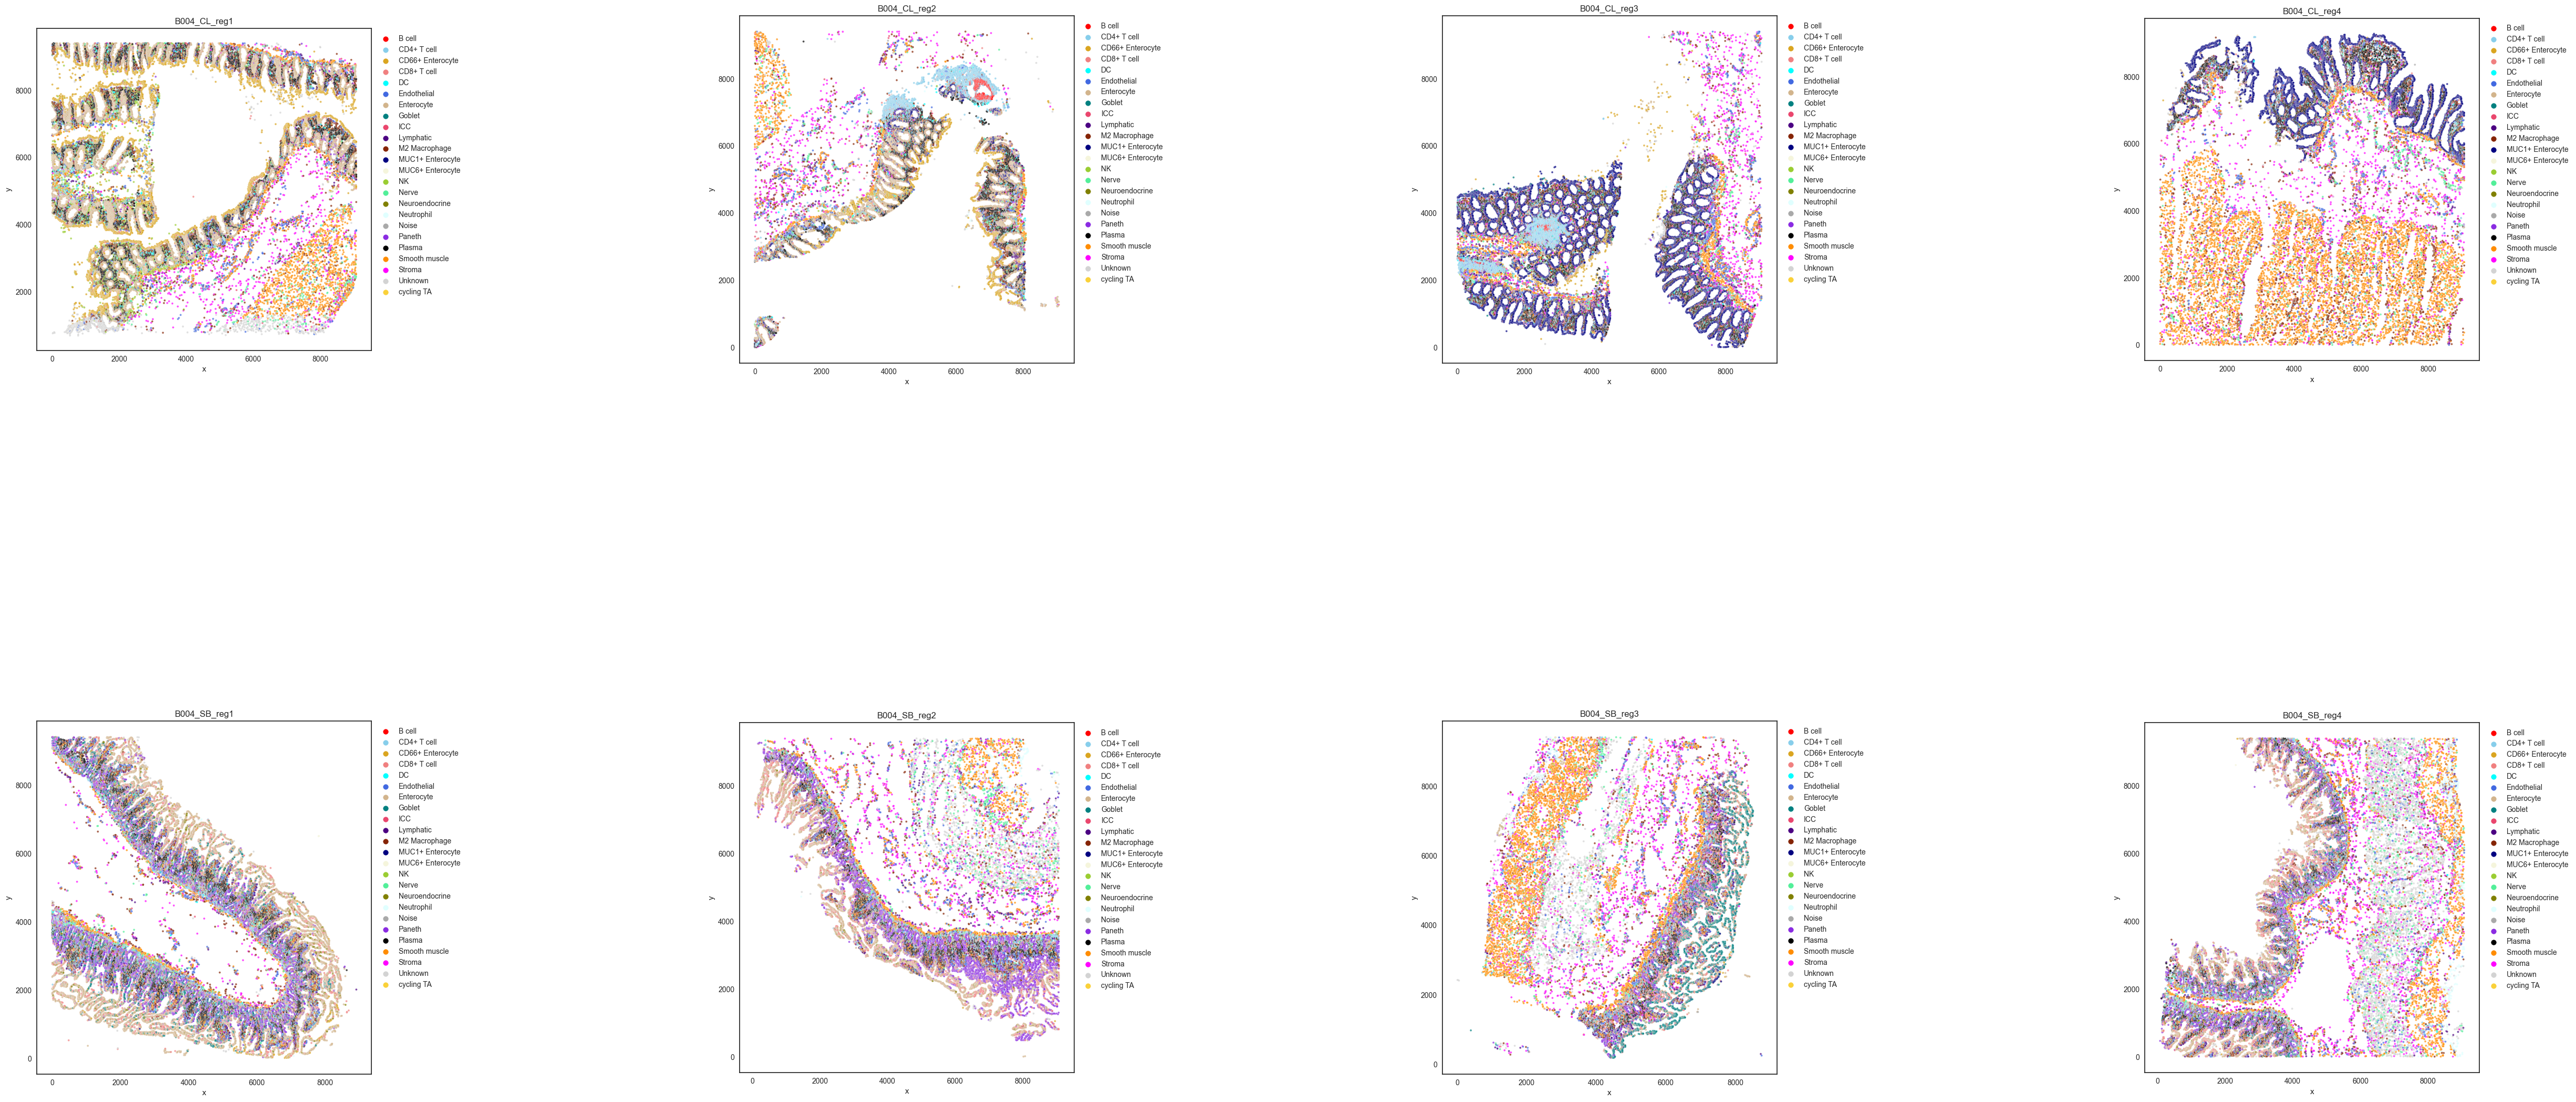

In [7]:
pl_catplot_ad(adata, color = "celltype_fine", # specify group column name here (e.g. celltype_fine)
               unique_region = "unique_region", subset=None, # specify unique_regions here
               X='x', Y='y', # specify x and y columns here
               invert_y=False, # invert y axis
               size=8, alpha=0.7, # adjust dot size and transparency here
               palette=cell_color_dic, # specify color dictionary here
               savefig=False, # save figure as pdf
               output_dir='./', # specify output directory here (if savefig=True)
               figsize=15, style='white', axis='on', scatter_kws={}, # adjust figure size and style here
               n_columns=4, # adjust number of columns for plotting here (how many plots do you want in one row?)
               legend_padding=0.5) # adjust padding of legend here

Function to plot a basic bar plot showing the percentage of categories per group.

(celltype_fine  Smooth muscle       ICC    Stroma   Unknown     Nerve  \
 tissue                                                                 
 SB                  8.949961  0.728173  3.968185  5.802453  3.695417   
 CL                 11.407442  0.999070  4.344186  1.993488  3.124651   
 
 celltype_fine  M2 Macrophage  CD8+ T cell  Endothelial  CD66+ Enterocyte  \
 tissue                                                                     
 SB                  6.542485    12.159139     5.527312          0.152592   
 CL                  8.711628     2.711628     4.962791          5.802791   
 
 celltype_fine     Plasma  ...     Noise    Goblet  Neutrophil        DC  \
 tissue                    ...                                             
 SB              7.122018  ...  1.340913  6.021458    1.043635  0.502052   
 CL             11.313488  ...  1.086512  0.131163    0.460465  1.022326   
 
 celltype_fine        NK  Neuroendocrine     Paneth  MUC6+ Enterocyte   B cell  \
 tissue 

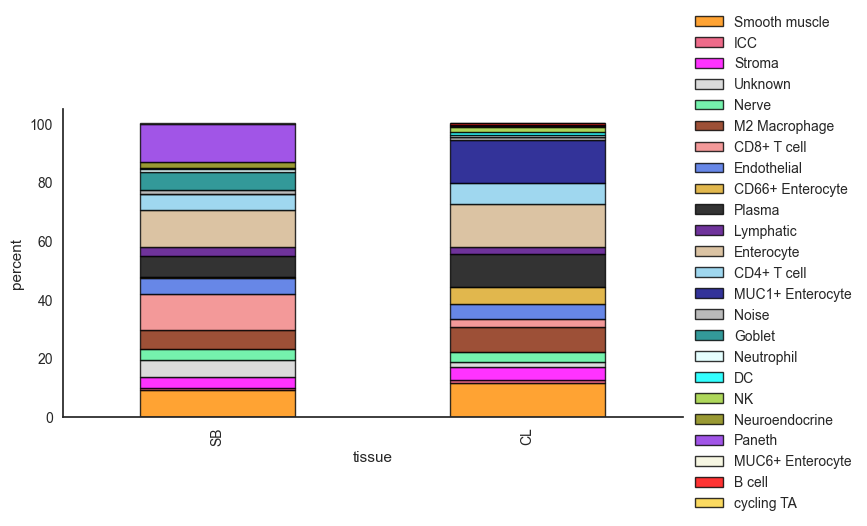

In [8]:
pl_stacked_bar_plot_ad(adata = adata, # adata object to use 
                      per_cat = 'celltype_fine', # column containing the categories that are used to fill the bar plot
                      grouping = 'tissue', # column containing a grouping variable (usually a condition or cell group)
                      output_dir = './', 
                      sub_col = None, 
                      cell_list = adata.obs['celltype_fine'].unique(),  # list of cell types to plot 
                      norm = False, # logical value to decide if normalization per group is performed 
                      fig_sizing = (8,4), # numeric value to modify the figure size 
                      name_cat = 'celltype_fine', 
                      col_order = ["SB", "CL"], # plotting order 
                      save_name = '/Percentage_cell_type_per_sample', # name for saved file 
                      color_dic = cell_color_dic # color dictionary 
                        ) 

Subset on specific cell types for the plot.

(celltype_fine  CD8+ T cell  CD66+ Enterocyte  Enterocyte    Goblet        DC  \
 tissue                                                                         
 SB               12.159139          0.152592   12.872289  6.021458  0.502052   
 CL                2.711628          5.802791   14.506047  0.131163  1.022326   
 
 celltype_fine     Paneth  
 tissue                    
 SB             13.096829  
 CL              0.305116  ,
 ['CD8+ T cell', 'CD66+ Enterocyte', 'Enterocyte', 'Goblet', 'DC', 'Paneth'])

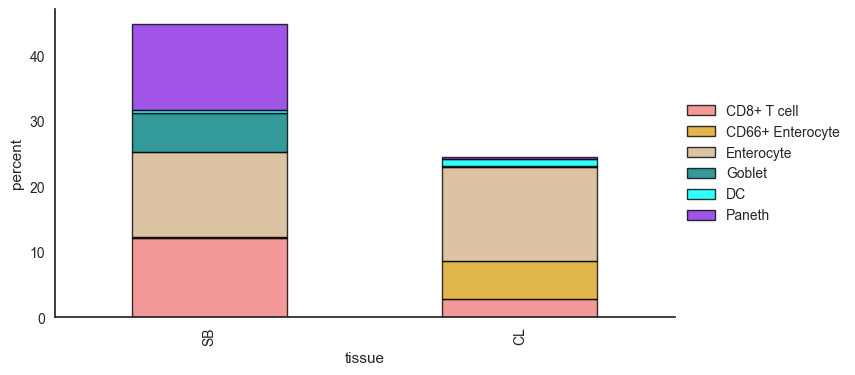

In [9]:
####### Stacked Bar Plot
# Shows percentage of category per group. 
pl_stacked_bar_plot_ad(adata = adata, # adata object to use 
                      per_cat = 'celltype_fine', # column containing the categories that are used to fill the bar plot
                      grouping = 'tissue', # column containing a grouping variable (usually a condition or cell group)
                      output_dir = output_dir, 
                      sub_col = None, 
                      cell_list = ["CD8+ T cell", "DC", "Enterocyte", 'Goblet', "CD66+ Enterocyte", "Paneth"],  # list of cell types to plot 
                      norm = False, # normalize to 100% per group
                      fig_sizing = (8,4), # numeric value to modify the figure size 
                      name_cat = 'celltype_fine', 
                      col_order = ["SB", "CL"], # plotting order 
                      save_name = '/Percentage_cell_type_per_sample', # name for saved file 
                      color_dic = cell_color_dic # color dictionary 
                        ) 

Here is another example for a useful plot. 

/Users/timnoahkempchen/Desktop/SAP5/src/plot_pl.py:2604: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data = melt_per_plot, x=grouping, y='percentage', dodge=True,order=plot_order,\


<Figure size 400x500 with 0 Axes>

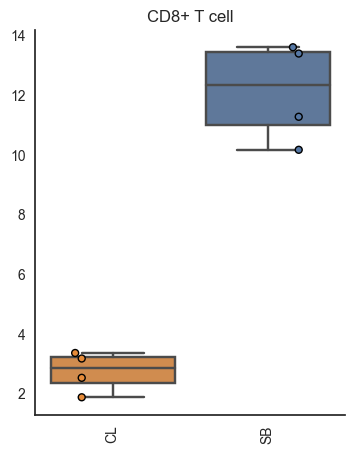

In [10]:
# Arguments for swarm boxplot:
grouping = "tissue" # column containing a grouping variable (usually a condition or cell group)
sub_col = 'celltype_fine' # column containing the categories that are used to fill the plot
sub_list = ["CD8+ T cell"] # list of cell types to plot
replicate_column = "unique_region"
output_dir = output_dir
norm = False
per_cat = "celltype_fine"
fig_sizing=(4,5) # numeric value to modify the figure size 
save_name = '/CD8+_per_sample'
color_dic = tissue_location_color_dic # color dictionary 
plot_order=None
flip=True

melt_per_plot = pl_swarm_box_ad(adata, 
                          grouping = grouping, 
                          replicate = replicate_column, 
                          sub_col = sub_col, 
                          sub_list = sub_list, 
                          per_cat = per_cat, 
                          norm=norm,
                          figure_sizing= fig_sizing, 
                          save_name=save_name, 
                          plot_order=plot_order, 
                          color_dic=color_dic, 
                          flip=flip,
                          output_dir = output_dir)

These are just some basic functions we supply to get started. Due to its flexible nature the pipeline allows to plug in many different packages to generate exactly the visualization you need. 

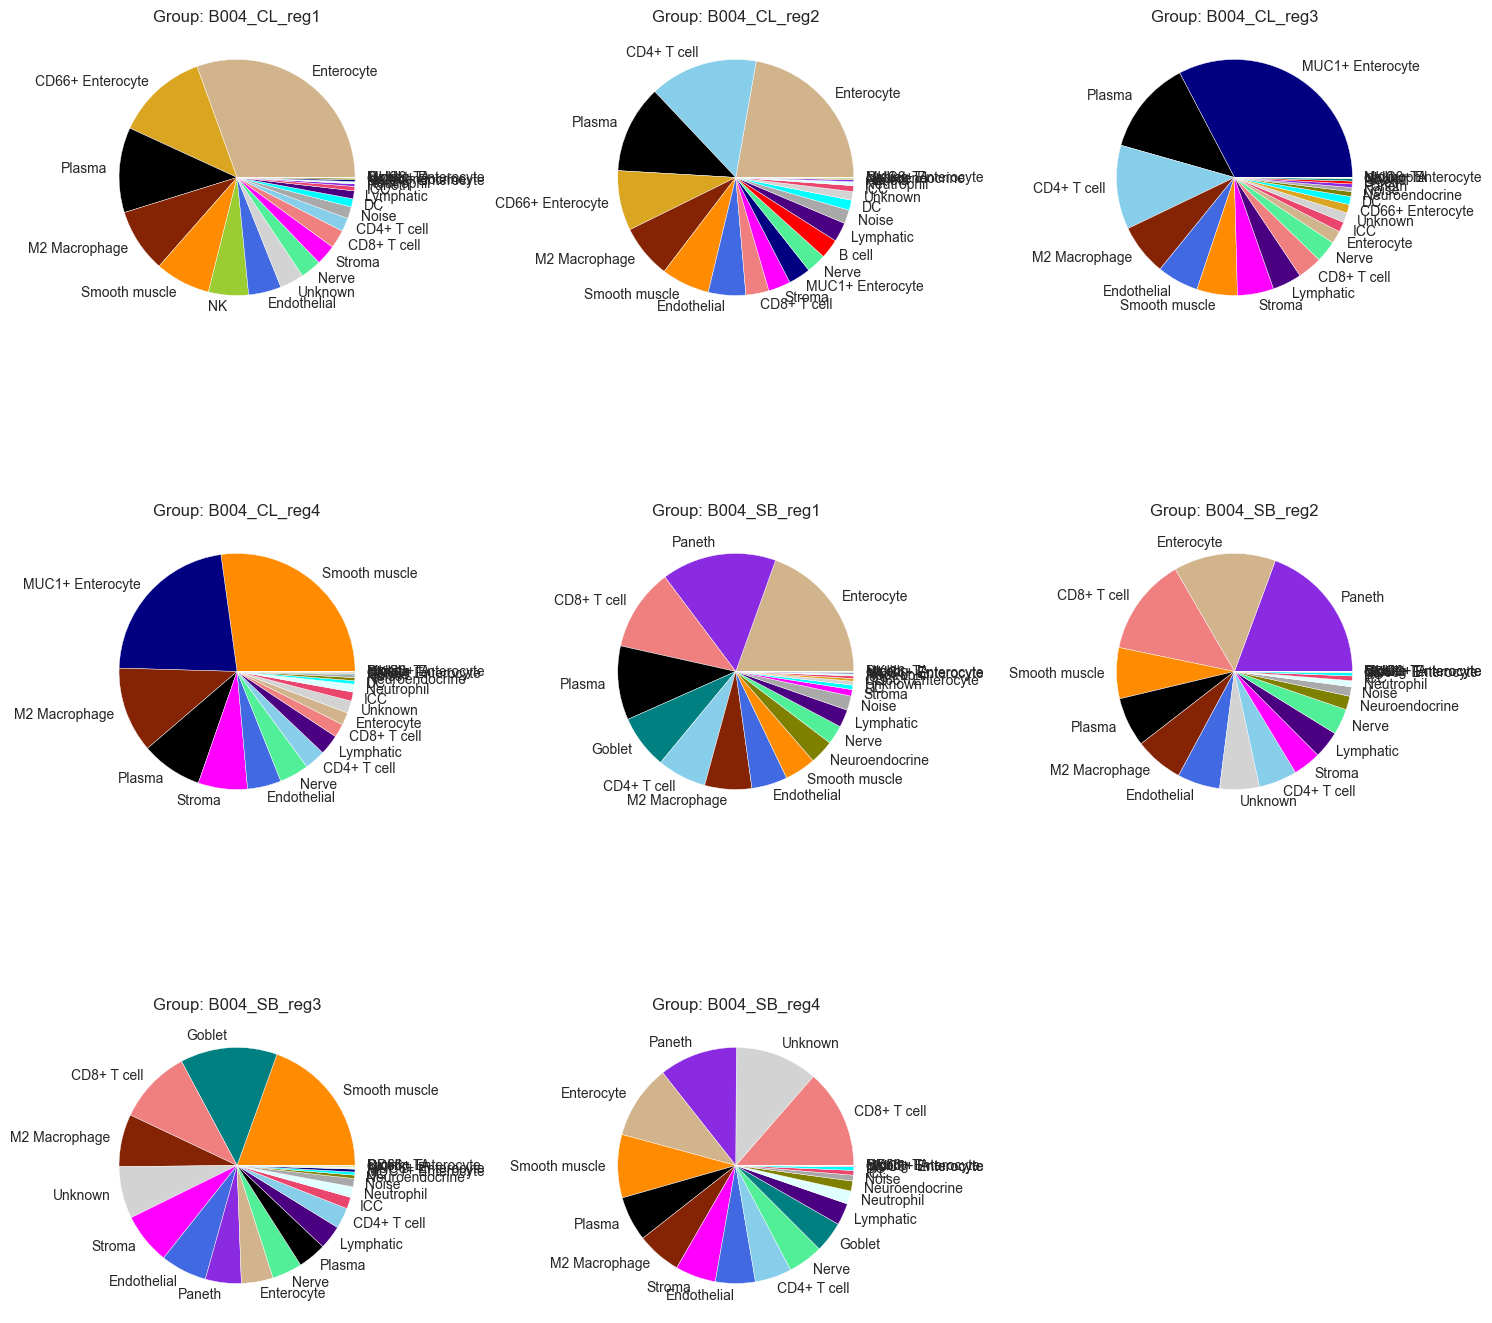

In [11]:
pl_create_pie_charts_ad(adata, 
                        group_column = "unique_region", 
                        count_column = "celltype_fine", 
                        plot_order=None, 
                        show_percentages=False, 
                        color_dict=cell_color_dic)

### Shannon Diversity

In [12]:
adata.obs

x            y  region_num donor tissue  region   area  \
0          2.019231    35.865385           4  B004     CL  reg004   52.0   
1          4.009615   110.221154           4  B004     CL  reg004  104.0   
2          1.315789   347.157895           4  B004     CL  reg004   19.0   
3          3.132353   705.058824           4  B004     CL  reg004   68.0   
4          3.740741  1795.537037           4  B004     CL  reg004   54.0   
...             ...          ...         ...   ...    ...     ...    ...   
233976  9068.375000  3818.500000           1  B004     CL  reg001   64.0   
233977  9068.127273  8333.418182           1  B004     CL  reg001   55.0   
233978  9068.824561  5428.912281           1  B004     CL  reg001   57.0   
233979  9068.835821  5486.462687           1  B004     CL  reg001   67.0   
233980  9069.333333  5337.666667           1  B004     CL  reg001   48.0   

       unique_region leiden_1 leiden_1.5 leiden_1_subcluster leiden_2  \
0       B004_CL_reg4       11         14                  11        4   
1       B004_CL_reg4       26         35                  26       48   
2       B004_CL_reg4       11         14                  11        4   
3       B004_CL_reg4        9         13                   9       21   
4       B004_CL_reg4       15         12                  15        9   
...              ...      ...        ...                 ...      ...   
233976  B004_CL_reg1        6          0                   6       11   
233977  B004_CL_reg1        4          7                   4       28   
233978  B004_CL_reg1        4          7                   4        1   
233979  B004_CL_reg1        4          7                   4        1   
233980  B004_CL_reg1       18         37                  18       42   

             celltype leiden_1_subcluster_22  celltype_fine celltype_fine_new  
0       Smooth muscle                     11  Smooth muscle     Smooth muscle  
1                 ICC                     26            ICC               ICC  
2       Smooth muscle                     11  Smooth muscle     Smooth muscle  
3              Stroma                      9         Stroma            Stroma  
4                  TA                     15  Smooth muscle     Smooth muscle  
...               ...                    ...            ...               ...  
233976    Endothelial                      6    Endothelial       Endothelial  
233977         Plasma                      4         Plasma            Plasma  
233978         Plasma                      4         Plasma            Plasma  
233979         Plasma                      4         Plasma            Plasma  
233980      Lymphatic                     18      Lymphatic         Lymphatic  

[233981 rows x 16 columns]

/Users/timnoahkempchen/Desktop/SAP5/src/plot_pl.py:374: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_order = res.groupby(grouping).mean().reset_index().sort_values(by='Shannon Diversity')[grouping].to_list()
/Users/timnoahkempchen/Desktop/SAP5/src/plot_pl.py:382: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data = res, x=grouping, y='Shannon Diversity', dodge=True, order=plot_order,\


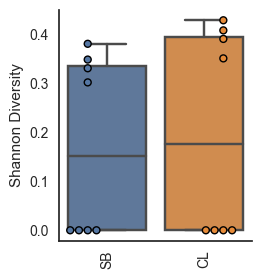

In [13]:
grouping = "tissue" # column containing a grouping variable (usually a condition or cell group)
sub_list = ["Plasma", "Endothelial"] # list of cell types to plot
rep = "unique_region"
per_categ = "celltype_fine"
sub_column = 'celltype_fine'
normalize = False
save = True # logical value to decide if the generated plot should be saved 
color_dic = tissue_location_color_dic # color dictionary 
fig_size = 8 # numeric value to modify the figure size 
plot_order = None # optional list to specify the plotting order
output_dir = output_dir # directory to save output

####### Swarm Boxplot of Shannon diversity score
# calculate shannon diversity 
tt, test_results, res  = tl_Shan_div_ad(adata = adata, 
                                     sub_l = sub_list, 
                                     group_com = grouping, 
                                     per_categ = per_categ, 
                                     rep = rep, 
                                     sub_column = sub_column, 
                                     normalize = normalize) 

# plot results of shannon diversity function
pl_Shan_div(tt, 
            test_results, 
            res, 
            grouping = grouping, 
            color_dic = color_dic, 
            sub_list = sub_list, 
            output_dir = output_dir, 
            save=save, 
            plot_order = plot_order,
            #save_name= "/Shannon_Cell_common_all",
            fig_size=2.5)

In [14]:
tt

tissue unique_region celltype_fine  percentage  fraction   Shannon
0      CL  B004_CL_reg1   Endothelial    4.480688  0.044807 -0.139143
1      CL  B004_CL_reg2   Endothelial    5.120768  0.051208 -0.152182
2      CL  B004_CL_reg3   Endothelial    5.701694  0.057017 -0.163320
3      CL  B004_CL_reg4   Endothelial    4.623329  0.046233 -0.142124
4      CL  B004_SB_reg1   Endothelial    0.000000  0.000000  0.000000
5      CL  B004_SB_reg2   Endothelial    0.000000  0.000000  0.000000
6      CL  B004_SB_reg3   Endothelial    0.000000  0.000000  0.000000
7      CL  B004_SB_reg4   Endothelial    0.000000  0.000000  0.000000
8      SB  B004_CL_reg1   Endothelial    0.000000  0.000000  0.000000
9      SB  B004_CL_reg2   Endothelial    0.000000  0.000000  0.000000
10     SB  B004_CL_reg3   Endothelial    0.000000  0.000000  0.000000
11     SB  B004_CL_reg4   Endothelial    0.000000  0.000000  0.000000
12     SB  B004_SB_reg1   Endothelial    4.898364  0.048984 -0.147748
13     SB  B004_SB_reg2   Endothelial    5.822279  0.058223 -0.165555
14     SB  B004_SB_reg3   Endothelial    6.345760  0.063458 -0.174977
15     SB  B004_SB_reg4   Endothelial    5.459579  0.054596 -0.158754
16     CL  B004_CL_reg1        Plasma   11.661738  0.116617 -0.250594
17     CL  B004_CL_reg2        Plasma   12.046807  0.120468 -0.254955
18     CL  B004_CL_reg3        Plasma   12.918331  0.129183 -0.264377
19     CL  B004_CL_reg4        Plasma    8.394044  0.083940 -0.207975
20     CL  B004_SB_reg1        Plasma    0.000000  0.000000  0.000000
21     CL  B004_SB_reg2        Plasma    0.000000  0.000000  0.000000
22     CL  B004_SB_reg3        Plasma    0.000000  0.000000  0.000000
23     CL  B004_SB_reg4        Plasma    0.000000  0.000000  0.000000
24     SB  B004_CL_reg1        Plasma    0.000000  0.000000  0.000000
25     SB  B004_CL_reg2        Plasma    0.000000  0.000000  0.000000
26     SB  B004_CL_reg3        Plasma    0.000000  0.000000  0.000000
27     SB  B004_CL_reg4        Plasma    0.000000  0.000000  0.000000
28     SB  B004_SB_reg1        Plasma   10.138820  0.101388 -0.232057
29     SB  B004_SB_reg2        Plasma    6.759949  0.067599 -0.182123
30     SB  B004_SB_reg3        Plasma    3.886778  0.038868 -0.126227
31     SB  B004_SB_reg4        Plasma    6.134456  0.061345 -0.171228

### Cell-Cell correlation

/Users/timnoahkempchen/Desktop/SAP5/src/tools_tl.py:2024: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cmat = cc.corr()


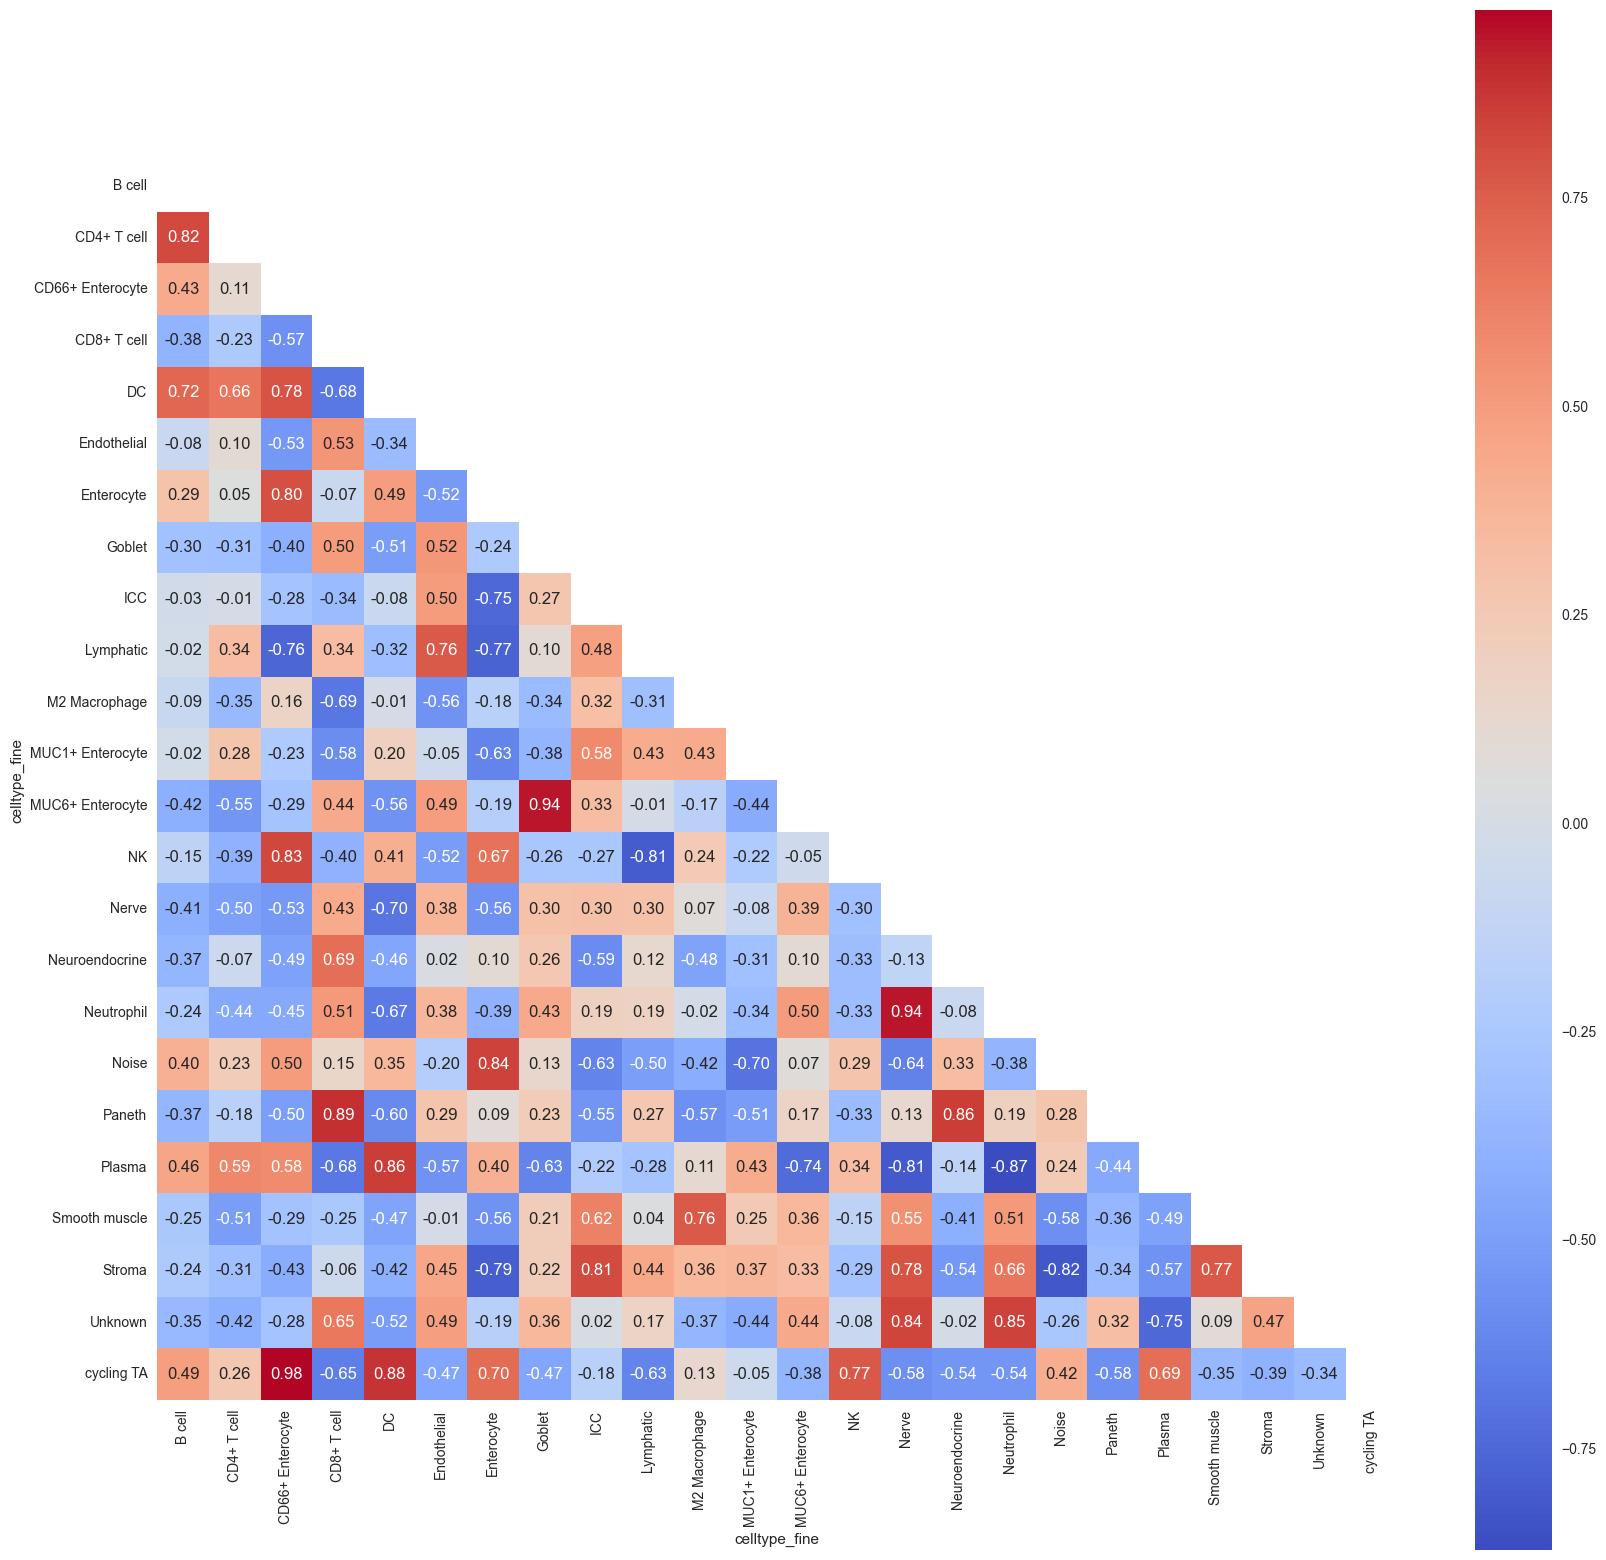

In [15]:
cmat, cc = tl_corr_cell_ad(adata, 
             per_categ = "celltype_fine", 
             grouping_col = "tissue", 
             rep = "unique_region", 
             sub_column = "celltype_fine", 
             normed=False, # norm cell count to group
             sub_list2=None)

pl_plot_correlation_matrix(cmat)

NameError: name 'sp' is not defined

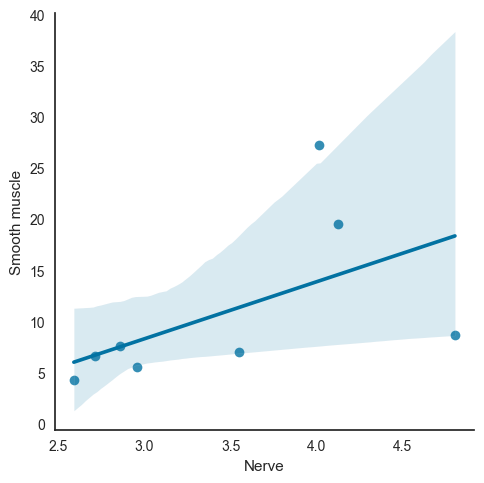

In [23]:
cell = "Nerve"
cell2 = "Smooth muscle"
pl_plot_scatter_correlation(cc, x=cell, y=cell2, xlabel=cell, ylabel=cell2, save_path=None)